In [1]:
import pandas as pd
from fanalysis.ca import CA
import numpy as np

In [2]:
df = pd.read_table("data/ca_data", header=0, index_col=0, delimiter="\t", encoding="utf-8")

print(df)

                Radio  Tel.  Quot.Nat.  Quot.Reg.  Press.Mag.  Press.TV
Prof                                                                   
Agriculteur        96   118          2         71          50        17
Petit.Patr.       122   136         11         76          49        41
Prof.Cad.Sup      193   184         74         63         103        79
Prof.Int.         360   365         63        145         141       184
Employe           511   593         57        217         172       306
Ouvr.Qualif.      385   457         42        174         104       220
Ouvr.Non-Qual.    156   185          8         69          42        85
Inactif          1474  1931        181        852         642       782


In [5]:
#Récupérer les valeurs du tableau
X = df.values
n = np.sum(X)
print(n)

#Ajouter la somme de répition par ligne et par colonne 
X_ligne = np.append(X,[[np.sum(X[i])] for i in range(len(X))], axis = 1) #calcul somme par ligne avec résultat fin de ligne Xi.
X_ligne_colonne = np.append(X_ligne, [[np.sum(X_ligne[:,j]) for j in range(X_ligne.shape[1])]], axis = 0) #calcul somme par colonne avec résultat fin de colonne X.j
X_ligne_colonne

12388


array([[   96,   118,     2,    71,    50,    17,   354],
       [  122,   136,    11,    76,    49,    41,   435],
       [  193,   184,    74,    63,   103,    79,   696],
       [  360,   365,    63,   145,   141,   184,  1258],
       [  511,   593,    57,   217,   172,   306,  1856],
       [  385,   457,    42,   174,   104,   220,  1382],
       [  156,   185,     8,    69,    42,    85,   545],
       [ 1474,  1931,   181,   852,   642,   782,  5862],
       [ 3297,  3969,   438,  1667,  1303,  1714, 12388]])

In [6]:
#Récuperer les valeurs du tableau et calculer les valeurs des f_ij
X_fij = np.round(X_ligne_colonne/n, decimals = 3)
X_fij

array([[0.008, 0.01 , 0.   , 0.006, 0.004, 0.001, 0.029],
       [0.01 , 0.011, 0.001, 0.006, 0.004, 0.003, 0.035],
       [0.016, 0.015, 0.006, 0.005, 0.008, 0.006, 0.056],
       [0.029, 0.029, 0.005, 0.012, 0.011, 0.015, 0.102],
       [0.041, 0.048, 0.005, 0.018, 0.014, 0.025, 0.15 ],
       [0.031, 0.037, 0.003, 0.014, 0.008, 0.018, 0.112],
       [0.013, 0.015, 0.001, 0.006, 0.003, 0.007, 0.044],
       [0.119, 0.156, 0.015, 0.069, 0.052, 0.063, 0.473],
       [0.266, 0.32 , 0.035, 0.135, 0.105, 0.138, 1.   ]])

In [9]:
my_ca = CA(row_labels=df.index.values, col_labels=df.columns.values, n_components = 2) 

In [10]:
my_ca.fit(X)

CA(col_labels=array(['Radio', 'Tel.', 'Quot.Nat.', 'Quot.Reg.', 'Press.Mag.',
       'Press.TV'], dtype=object),
   n_components=2,
   row_labels=array(['Agriculteur', 'Petit.Patr.', 'Prof.Cad.Sup', 'Prof.Int.',
       'Employe', 'Ouvr.Qualif.', 'Ouvr.Non-Qual.', 'Inactif'],
      dtype=object))

In [11]:
#Analyse des valeurs propres #Valeurs propres expriment inertie cad ecart à l'indépendance.

#Affichage des valeurs propres
print("Les valeurs propres sont:")
print(my_ca.eig_.shape[1])
[print("axe: "+str(i+1), round(my_ca.eig_[0][i],5)) for i in range(my_ca.eig_.shape[1])]

#Pourcentage de l'intertie exprimé par chaque axe (écart à l'indépendance)
print("Les pourcentages de l'intertie exprimé par chaque axe:")
[print("axe: "+str(i+1), round(my_ca.eig_[1][i],5)) for i in range(my_ca.eig_.shape[1])]

#Pourcentage cumulé de'intertie totale
print("Les pourcentages de l'intertie exprimé par chaque axe:")
[print("axes: "+ str([j+1 for j in range(i+1)]), "Inertie cumulée:",round(my_ca.eig_[2][i],5)) for i in range(my_ca.eig_.shape[1])]

Les valeurs propres sont:
2
axe: 1 0.01386
axe: 2 0.00721
Les pourcentages de l'intertie exprimé par chaque axe:
axe: 1 62.19818
axe: 2 32.36503
Les pourcentages de l'intertie exprimé par chaque axe:
axes: [1] Inertie cumulée: 62.19818
axes: [1, 2] Inertie cumulée: 94.56321


[None, None]

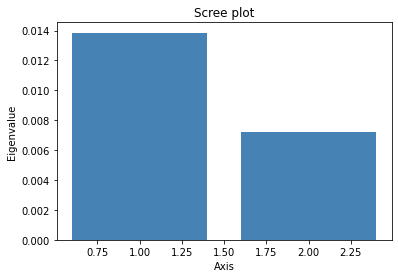

In [12]:
#Affichage des valeurs propores (Les valeurs propores décroient) 
my_ca.plot_eigenvalues()

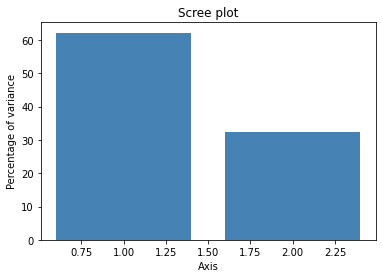

In [13]:
#Affichage des inerties exprimées par les axes 
my_ca.plot_eigenvalues(type="percentage")

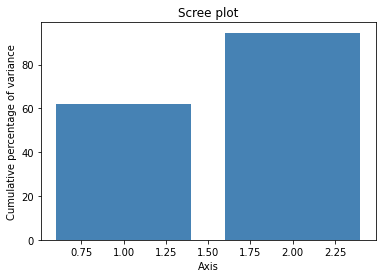

In [14]:
#Affichage de l'inertie cumulative 
my_ca.plot_eigenvalues(type="cumulative")

In [15]:
# Qualité de représentation et contribution des points lignes dans les axes 
df_rows = my_ca.row_topandas()
df_rows

row_coord_dim1  row_coord_dim2  row_contrib_dim1  \
Agriculteur           0.166150        0.309612          5.692772   
Petit.Patr.           0.068377        0.143151          1.184762   
Prof.Cad.Sup         -0.429976        0.060873         74.957901   
Prof.Int.            -0.106603       -0.032597          8.327911   
Employe               0.015729       -0.095469          0.267471   
Ouvr.Qualif.          0.043713       -0.101379          1.538298   
Ouvr.Non-Qual.        0.117797       -0.094864          4.405391   
Inactif               0.032584        0.033395          3.625494   

                row_contrib_dim2  row_cos2_dim1  row_cos2_dim2  
Agriculteur            37.989221       0.213512       0.741407  
Petit.Patr.             9.979255       0.153835       0.674250  
Prof.Cad.Sup            2.887188       0.978183       0.019605  
Prof.Int.               1.496416       0.802207       0.075007  
Employe                18.937575       0.025214       0.928949  
Ouvr.Qualif.           15.900944       0.138275       0.743745  
Ouvr.Non-Qual.          5.490645       0.555680       0.360381  
Inactif                 7.318755       0.372204       0.390976

In [16]:
#Coordonnées des points lignes dans les deux axes
print(my_ca.row_coord_)

[[ 0.16614986  0.30961174]
 [ 0.06837709  0.14315064]
 [-0.42997558  0.06087258]
 [-0.10660251 -0.03259679]
 [ 0.01572857 -0.09546893]
 [ 0.04371252 -0.1013786 ]
 [ 0.11779685 -0.09486419]
 [ 0.0325837   0.03339524]]


In [17]:
# Contributions des points lignes dans les deux axes
print(my_ca.row_contrib_)

[[ 5.69277232 37.9892214 ]
 [ 1.18476189  9.97925473]
 [74.95790095  2.88718751]
 [ 8.32791077  1.4964164 ]
 [ 0.26747131 18.93757502]
 [ 1.53829776 15.90094419]
 [ 4.40539088  5.49064526]
 [ 3.62549412  7.31875549]]


In [18]:
# Cos2 des points lignes (Qualité de représentation)
print(my_ca.row_cos2_)

[[0.21351182 0.74140722]
 [0.15383515 0.67424994]
 [0.97818335 0.01960542]
 [0.80220729 0.07500692]
 [0.02521427 0.92894899]
 [0.13827479 0.7437446 ]
 [0.55568018 0.36038123]
 [0.37220445 0.39097583]]


In [19]:
# Qualité de représentation et contribution des points colonnes dans les axes
df_cols = my_ca.col_topandas()
df_cols

col_coord_dim1  col_coord_dim2  col_contrib_dim1  \
Radio            -0.014940       -0.022106          0.428700   
Tel.              0.053283       -0.002081          6.564128   
Quot.Nat.        -0.540675        0.006207         74.587719   
Quot.Reg.         0.108828        0.109645         11.501128   
Press.Mag.       -0.094813        0.132497          6.823338   
Press.TV          0.009754       -0.161609          0.094987   

            col_contrib_dim2  col_cos2_dim1  col_cos2_dim2  
Radio               1.803681       0.076956       0.168480  
Tel.                0.019242       0.850792       0.001298  
Quot.Nat.           0.018890       0.992981       0.000131  
Quot.Reg.          22.435641       0.486643       0.493977  
Press.Mag.         25.608027       0.316773       0.618623  
Press.TV           50.114518       0.003492       0.958663

In [20]:
# Coordonnées des points colonnes
print(my_ca.col_coord_)

[[-0.01494022 -0.02210596]
 [ 0.05328288 -0.002081  ]
 [-0.54067502  0.00620677]
 [ 0.10882837  0.10964537]
 [-0.09481257  0.13249659]
 [ 0.00975363 -0.16160888]]


In [21]:
# Contributions des points colonnes
print(my_ca.col_contrib_)

[[4.28700199e-01 1.80368136e+00]
 [6.56412758e+00 1.92419243e-02]
 [7.45877189e+01 1.88897960e-02]
 [1.15011283e+01 2.24356413e+01]
 [6.82333790e+00 2.56080275e+01]
 [9.49870405e-02 5.01145182e+01]]


In [22]:
# Cos2 des points colonnes (Qualité de représentation)
print(my_ca.col_cos2_)

[[7.69561735e-02 1.68479830e-01]
 [8.50792093e-01 1.29775661e-03]
 [9.92981084e-01 1.30857685e-04]
 [4.86642767e-01 4.93976885e-01]
 [3.16773320e-01 6.18623139e-01]
 [3.49195247e-03 9.58662728e-01]]


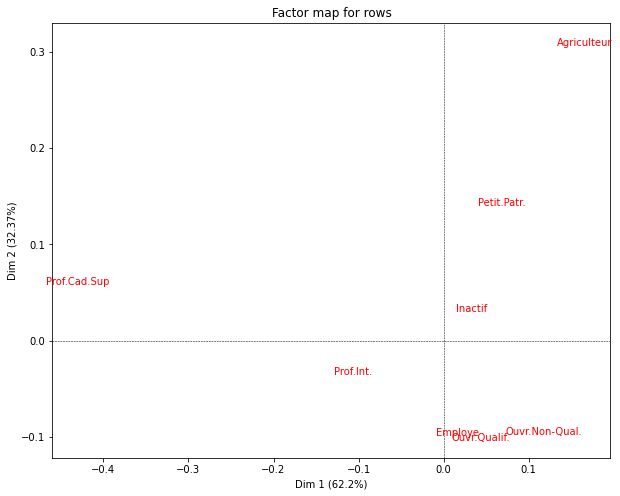

In [23]:
# Mapping des points lignes (Graphique)
my_ca.mapping_row(num_x_axis=1, num_y_axis=2, figsize=(10, 8))

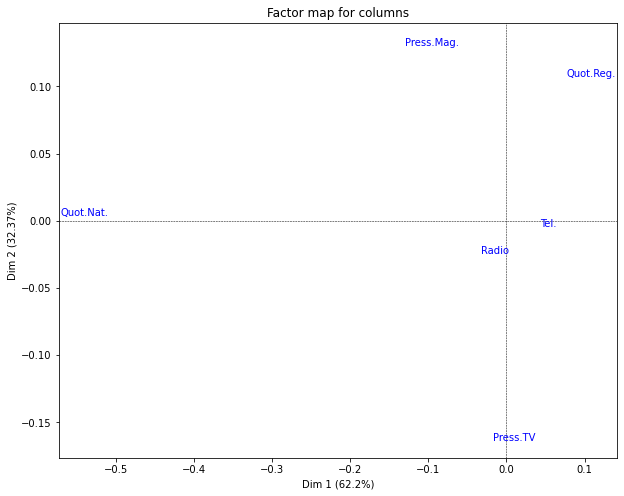

In [24]:
# Mapping des points colonnes
my_ca.mapping_col(num_x_axis=1, num_y_axis=2, figsize=(10, 8))

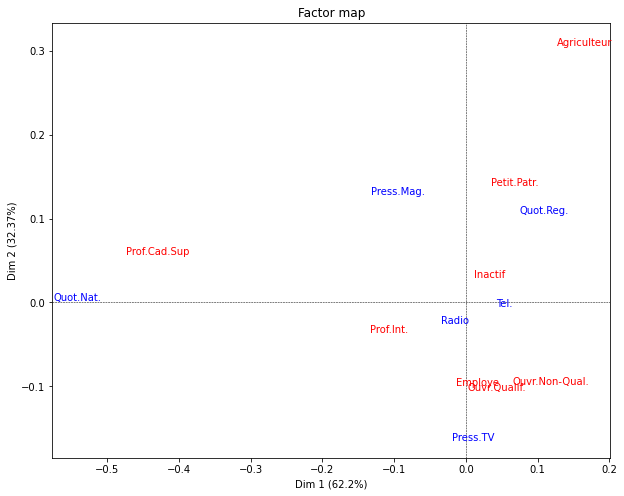

In [25]:
# Mapping simultané des points lignes et colonnes
# Les paramètres de la méthode mapping indiquent que ce sont les axes 1 et 2 qui sont ici représentés
my_ca.mapping(num_x_axis=1, num_y_axis=2, figsize=(10, 8))

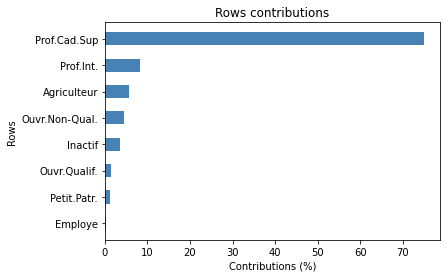

In [26]:
# Classement des points lignes en fonction de leur contribution au 1er axe
# Le paramètre de la méthode plot_row_contrib indique que c'est pour l'axe numéro 1 que les contributions sont ici 
# représentées
my_ca.plot_row_contrib(num_axis=1)

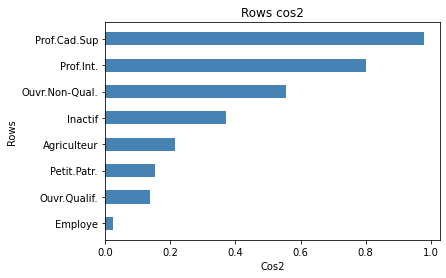

In [27]:
# Classement des points lignes en fonction de leur cos2 sur le 1er axe
my_ca.plot_row_cos2(num_axis=1)

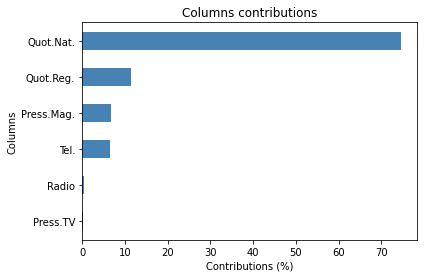

In [28]:
# Classement des points colonnes en fonction de leur contribution au 1er axe
my_ca.plot_col_contrib(num_axis=1)

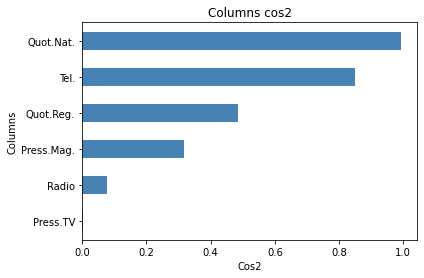

In [29]:
# Classement des points colonnes en fonction de leur cos2 sur le 1er axe
my_ca.plot_col_cos2(num_axis=1)